# Perform Principal component analysis and perform clustering using first 
3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
optimum number of clusters and check whether we have obtained same number of clusters with the original data 
(class column we have ignored at the begining who shows it has 3 clusters)df


In [1]:
import pandas as pd 
import numpy as np

In [2]:
 wine= pd.read_csv("C:\\Excelr Data\\Assignments\\PCA\\wine.csv")

In [3]:
wine.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [4]:
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 

In [6]:
# Normalizing the numerical data 
wine_normal = scale(wine)
wine_normal

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [7]:
pca = PCA()
pca_values = pca.fit_transform(wine_normal)

In [8]:
pca_values.shape

(178, 14)

In [9]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 , 0.03955707, 0.02500244, 0.02103871, 0.01873615,
       0.01613203, 0.01205691, 0.00925458, 0.00412945])

In [10]:
pca.components_[0]

array([ 0.39366953, -0.13632501,  0.22267638, -0.00225793,  0.22429849,
       -0.12463016, -0.35926404, -0.39071171,  0.2670012 , -0.2790625 ,
        0.08931829, -0.27682265, -0.35052618, -0.26951525])

In [11]:
# Cumulative variance 

var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 39.54,  57.38,  67.71,  74.34,  80.61,  85.42,  89.38,  91.88,
        93.98,  95.85,  97.46,  98.67,  99.6 , 100.01])

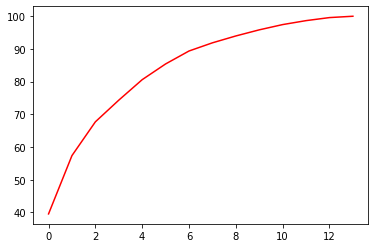

In [12]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="red")


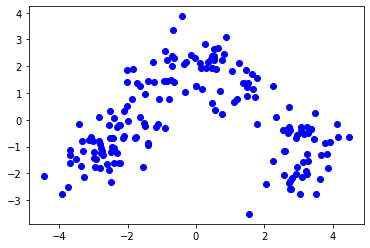

In [13]:
# plot between PCA1 and PCA2 
x = np.array(pca_values[:,0])
y = np.array(pca_values[:,1])
z = np.array(pca_values[:,2])
plt.plot(x,y,"bo")

In [14]:
new_wine = pd.DataFrame(pca_values[:,0:10])
new_wine

,0,1,2,3,4,5,6,7,8,9
0,-3.522934,-1.453098,-0.164795,-0.013273,0.737345,-0.300716,0.573876,0.055637,-0.458765,1.065570
1,-2.528858,0.330019,-2.026707,-0.417144,-0.283214,-0.884309,-0.029716,1.010372,0.218806,-0.020182
2,-2.785029,-1.036936,0.983238,0.664232,-0.387565,0.468842,0.488305,-0.268957,1.222769,-0.106249
3,-3.922588,-2.768210,-0.174968,0.565088,-0.324360,0.262616,-0.398364,0.618844,-0.114658,0.107671
4,-1.407511,-0.867773,2.025829,-0.440906,0.227949,-0.593762,0.447876,0.434937,-0.261548,0.112434
...,...,...,...,...,...,...,...,...,...,...
173,3.627996,-2.206617,-0.343668,0.751705,-1.004109,-1.143155,0.843455,-0.206626,-0.125419,-0.392619
174,2.942729,-1.752263,0.207480,0.399381,0.154223,-0.062465,0.139947,-0.565588,0.055341,-0.236267
175,3.027272,-2.756040,-0.940803,0.607758,1.128136,0.005290,0.733026,0.052545,-0.027881,-0.212749
176,2.755222,-2.293784,-0.550474,-0.391570,1.067083,1.012562,0.755423,0.426512,0.048784,0.479793


## Kmeans Clustering

In [15]:
import pandas as pd
import matplotlib.pylab as plt
from	sklearn.cluster	import	KMeans
from scipy.spatial.distance import cdist 
import numpy as np

In [16]:
 wine= pd.read_csv("C:\\Excelr Data\\Assignments\\PCA\\wine.csv")

In [17]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())	/	(i.max()	-	i.min())
    return (x)


In [18]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(wine)

In [19]:
df_norm.head(10)  # Top 10 rows

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.0,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.0,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.0,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.0,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
5,0.0,0.834211,0.201581,0.582888,0.237113,0.456522,0.789655,0.643460,0.396226,0.492114,0.466724,0.463415,0.578755,0.835949
6,0.0,0.884211,0.223320,0.582888,0.206186,0.282609,0.524138,0.459916,0.320755,0.495268,0.338737,0.439024,0.846154,0.721826
7,0.0,0.797368,0.278656,0.668449,0.360825,0.554348,0.558621,0.457806,0.339623,0.264984,0.321672,0.471545,0.846154,0.725392
8,0.0,1.000000,0.177866,0.433155,0.175258,0.293478,0.627586,0.556962,0.301887,0.495268,0.334471,0.487805,0.578755,0.547076
9,0.0,0.744737,0.120553,0.486631,0.278351,0.304348,0.689655,0.592827,0.169811,0.454259,0.506826,0.430894,0.835165,0.547076


In [20]:
###### screw plot or elbow curve ############
k = list(range(5,40))
k

[5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39]

In [21]:
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))


([<matplotlib.axis.XTick at 0x1f0267669c8>,
 <a list of 35 Text major ticklabel objects>)

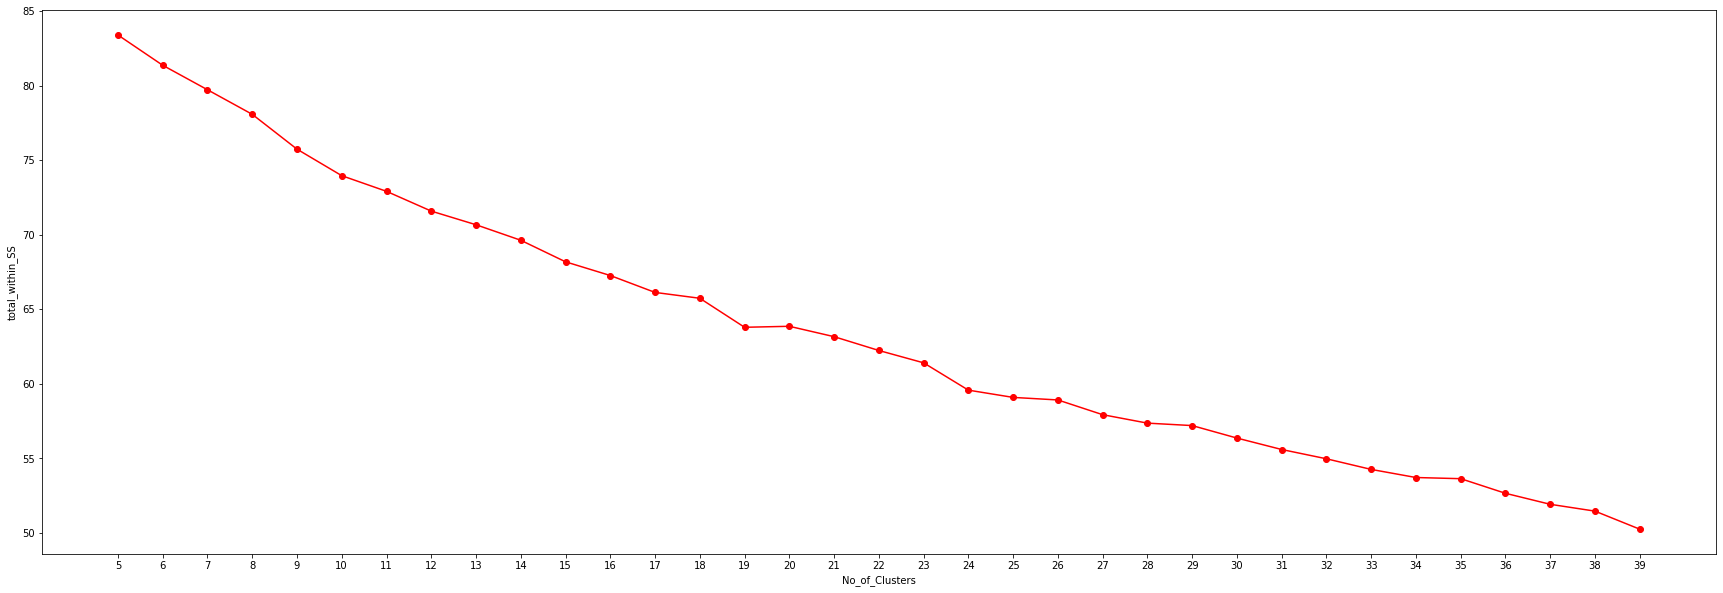

In [22]:
# Scree plot 
plt.figure(figsize=(30,10 ));
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)


In [23]:
# Selecting 5 clusters from the above scree plot which is the optimum number of clusters 
model=KMeans(n_clusters=7) 

In [24]:
model.fit(df_norm)

KMeans(n_clusters=7)

In [25]:
model.labels_ # getting the labels of clusters assigned to each row 

array([1, 1, 4, 4, 1, 4, 4, 1, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 1, 4, 1, 4, 4, 0, 6, 6, 0, 3, 6, 0,
       0, 0, 6, 0, 6, 3, 0, 3, 3, 0, 0, 6, 0, 3, 0, 0, 6, 6, 3, 0, 6, 6,
       6, 6, 6, 6, 6, 3, 3, 0, 0, 0, 3, 3, 0, 0, 3, 0, 0, 6, 0, 6, 0, 3,
       3, 3, 6, 6, 3, 6, 0, 0, 6, 3, 3, 3, 3, 3, 3, 3, 3, 6, 3, 6, 5, 5,
       5, 5, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 5, 5, 5, 2, 2, 5, 5, 5, 5, 2,
       5, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 2, 2, 5, 5, 5, 5, 5, 2, 2, 2, 2,
       2, 2])

In [26]:
md=pd.Series(model.labels_)  # converting numpy array into pandas series object 
md

0      1
1      1
2      4
3      4
4      1
      ..
173    2
174    2
175    2
176    2
177    2
Length: 178, dtype: int32

In [27]:
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [28]:
wine['clust']=md # creating a  new column and assigning it to new column 


In [29]:
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clust
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,4
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,4
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [30]:
wine = wine.iloc[:,[14,0,1,2,3,4,5,6,7,8,9,10,11,12,13]]
wine

,clust,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,4,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,4,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,2,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,2,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,2,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,2,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [31]:
wine.iloc[:,0:15].groupby(wine.clust).mean()

,clust,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
clust,,,,,,,,,,,,,,,
0,0,2.0,12.428750,1.413750,2.003750,18.270833,98.625000,2.109167,1.920833,0.295417,1.634167,3.191667,1.113333,2.803750,543.875000
1,1,1.0,13.599697,2.199697,2.439697,17.154545,106.969697,2.740909,2.818485,0.283333,1.744242,4.822424,1.022121,3.309697,974.545455
2,2,3.0,13.246786,3.561071,2.470000,21.571429,96.571429,1.832143,0.698571,0.527143,1.235714,7.533214,0.704643,1.736786,646.607143
3,3,2.0,12.230000,2.430000,2.367917,21.500000,94.666667,2.787917,2.697500,0.305000,1.942083,3.012083,0.977917,3.126667,484.416667
4,4,1.0,13.928846,1.770769,2.475769,16.888462,105.538462,2.966154,3.190385,0.298462,2.096154,6.424231,1.112692,2.965000,1294.884615
5,5,3.0,13.023500,3.015500,2.391000,21.200000,103.150000,1.464000,0.897500,0.336000,1.038500,7.204500,0.652000,1.609000,606.500000
6,6,2.0,12.173043,1.955217,2.367826,20.973913,90.173913,1.863043,1.604348,0.496087,1.300870,3.054783,1.078522,2.410000,530.695652


In [32]:
wine.to_csv("wine.csv")

### Heirarchial Clstering

In [33]:
import pandas as pd
import matplotlib.pylab as plt 
import numpy as np

In [34]:
wine= pd.read_csv("C:\\Excelr Data\\Assignments\\PCA\\wine.csv")
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [35]:
def norm_func(i):
    x = (i-i.mean())/(i.std())
    return (x) 

In [36]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(wine)

In [37]:
df_norm.head(4)  # Top 4 rows

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,-1.210529,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159
1,-1.210529,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526
2,-1.210529,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224
3,-1.210529,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007


In [38]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 

In [39]:
type(df_norm)

pandas.core.frame.DataFrame

In [40]:
p = np.array(df_norm) # converting into numpy array format 
#help(linkage)

In [41]:
z = linkage(df_norm, method="complete",metric="euclidean")

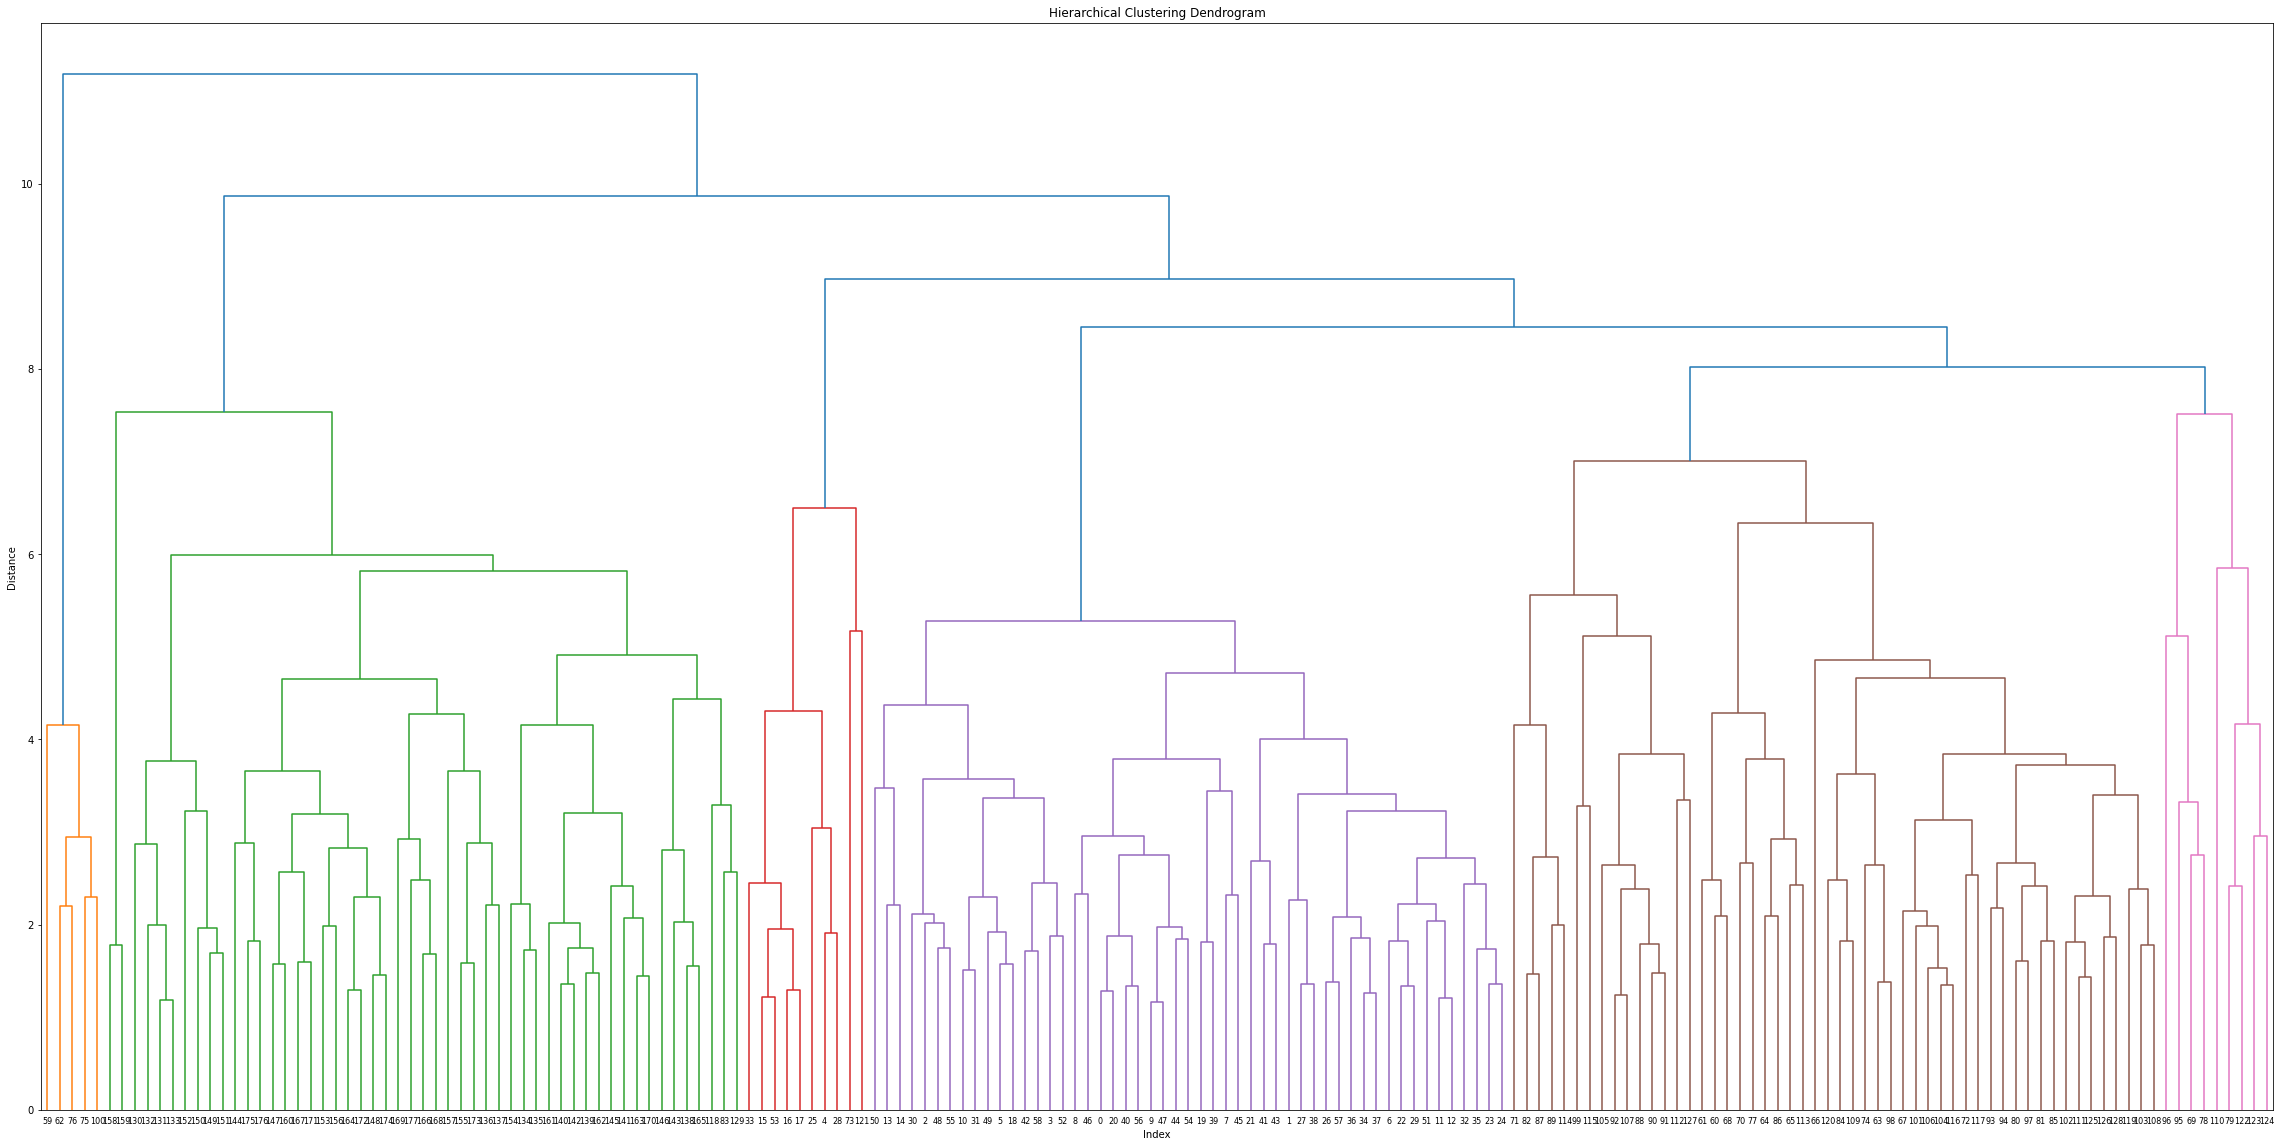

In [42]:
plt.figure(figsize=(40,20 ));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(
    z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [43]:
# Now applying AgglomerativeClustering choosing 3 as clusters from the dendrogram
from	sklearn.cluster	import	AgglomerativeClustering 
h_complete	=	AgglomerativeClustering(n_clusters=6,	linkage='complete',affinity = "euclidean").fit(df_norm) 


In [44]:
h_complete.labels_

array([4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 4,
       4, 4, 4, 1, 4, 4, 1, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 3, 5, 5, 3, 5, 5, 5,
       5, 5, 5, 2, 5, 5, 5, 1, 5, 3, 3, 5, 2, 2, 5, 5, 5, 0, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 2, 2, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       2, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 1, 2, 2, 2, 5, 5, 5, 5, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [45]:
cluster_labels=pd.Series(h_complete.labels_)

In [46]:
cluster_labels.value_counts()

5    52
4    51
0    51
1    10
2     9
3     5
dtype: int64

In [47]:
wine['clust']=cluster_labels # creating a  new column and assigning it to new column 

In [48]:
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clust
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,4
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,4
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,4
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,4
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


In [49]:
wine = wine.iloc[:,[14,0,1,2,3,4,5,6,7,8,9,10,11,12,13]]

In [50]:
wine.head()

,clust,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,4,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,4,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,4,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,4,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [51]:
# getting aggregate mean of each cluster
wine.groupby(wine.clust).mean()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
clust,,,,,,,,,,,,,,
0,2.941176,13.122353,3.364902,2.424706,21.343137,98.274510,1.685490,0.825490,0.449804,1.160196,7.172941,0.688235,1.715882,621.607843
1,1.200000,13.400000,1.899000,2.814000,21.770000,120.100000,2.941000,3.129000,0.383000,1.751000,5.355000,1.152000,3.075000,1026.000000
2,2.000000,12.257778,3.107778,2.234444,20.400000,117.888889,2.393333,2.147778,0.284444,2.473333,2.700000,0.976667,2.896667,575.555556
3,2.000000,12.562000,1.410000,1.722000,15.620000,92.400000,1.974000,1.626000,0.288000,1.032000,3.490000,1.194000,2.372000,536.000000
4,1.000000,13.754706,2.026667,2.403333,16.588235,104.529412,2.836078,2.992941,0.273725,1.929020,5.528824,1.046667,3.191176,1117.980392
5,2.000000,12.235577,1.670962,2.272115,20.311538,90.134615,2.252115,2.071538,0.378462,1.551923,3.024038,1.070500,2.806538,502.076923


In [52]:
# creating a csv file 
wine.to_csv("wine.csv") #,encoding="utf-8")